<a href="https://colab.research.google.com/github/calerovillalobos10/WebScraping_Python/blob/main/Lab1_PF3347.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1 Análisis en Ciencia de Datos


## Estudiantes

*   Bryan Thomas Calero Villalobos
*   Daniela Montero Parkinson
*   Christopher Zúñiga Cárdenas

## ¿Qué es web scraping?

### Definición de web scraping

Según Datademia (s.f.) el web scraping se puede ver como el proceso de recolectar datos desde un sitio web, sea de manera manual o automática. De manera similar, Cloudflare (s.f.) define este técnica como el uso de un programa informático para extraer datos que fueron realizados por otro programa.Este método en escencia convierte los datos no estructurados o semiestructurados de páginas web para ser manipulados por herramientas con el fin de ser analizados.


### Ejemplos de aplicaciones de web scraping en el mundo real

Realizando una combinación de lo mencionado por Liu (2021) y Mitchell (2024) algunas herramientas o aplicaciones utilizadas para hacer web scraping son:

*   *ScraperAPI*: esta herramienta tiene integración con Python y NodeJS. Además, facilita el scraping de datos de tablas HTML.
*   *Octoparse*: no se require habilidades de programación para utilizar la herramienta y es efeciva con sitios como: ecommerce, inversiones, criptomonedas y marketing.
*   *Parsehub*: está dirigida a analistas de datos, comercializadores, etc. Es un aplicativo visual de web scraping, en donde se pueden extraer los datos dando click en el sitio web.
*   *Crawly*: no necesita saber de programación, pero extrae elementos limitados. Además, convierte los datos a CSV o JSON.
*   *Scrapy*: está enfocado a desarrolladores de Python y con conocimiento de scraping. Utiliza una biblioteca asincrónica que le permite avanzar con las siguientes tareas antes de finalizar.
*   *Import.io*: esta herramienta extrae información de una web y los organiza por conjunto de datos.



### Herramientas comunes para realizar web scraping en Python
A continuación se describen algunas de las herramientas mas comunes para realizar web scraping en python. Las cuales son:

*  *Beautiful Soup:* Según lo descrito por Richardson (2021), nos dice que una de las principales herramientas es la libreria Beautiful Soup, dicha herramienta es una biblioteca en Python diseñada para facilitar la extracción de datos de archivos HTML y XML. Ofrece una serie de métodos intuitivos para navegar por la estructura del documento, localizar elementos específicos y extraer información de manera eficiente.
* *Requests:* Según lo descrito en la documentación del proyecto, Reitz (2021), nos drescribe que es una biblioteca de Python para realizar solicitudes HTTP de manera sencilla. Es ampliamente utilizada en combinación con otras herramientas de scraping para descargar el contenido web antes de analizarlo.
* *Scrapy*: se nos drescribe en el sitio oficial Scrapy Project (2024) que es un marco de trabajo completo para el web scraping en Python. Ofrece un enfoque estructurado para la extracción de datos, incluyendo la gestión de solicitudes, la extracción de información y el almacenamiento de datos. Es particularmente útil para proyectos de scraping a gran escala.


### Consideraciones éticas y legales al realizar web scraping

Segun lo mencionado por Orozco y Gómez (2019) relacionado con las consideraciones éticas y legales del web scraping, en la actualidad no existe una legislación específica que regule directamente el web scraping, esta práctica se basa en diversas teorías legales y leyes relacionadas con la obtención de información. Entre ellas se incluyen el derecho de autor y la propiedad intelectual, la protección de datos personales, los términos de servicio de los sitios web, el material con copyright y el propósito del raspado web.

Además de las anteriores leyes mencionadas por el autor, en Costa Rica también se cuentan con dos leyes y normativas para aplicarse indirectamente a la regulación del web scraping, tales como:
*   Ley de delitos informáticos(Ley 8148): Incluye las sansiones dadas por alterar, estafar o sabotear un sistema informático.
*   Ley de protección de la persona frente al tratamiento de sus datos personales(Ley 8968): Establece que el tratamiento de datos personales debe realizarse con el consentimiento informado del dueño de los datos y las respectivas sanciones que conlleva el inclumplimiento de dicha ley.


## Referencias

Cloudflare. (s.f.). *¿Qué es el scraping de datos?* https://www.cloudflare.com/es-es/learning/bots/what-is-data-scraping/

Datademia. (s.f.). *¿Qué es el web scraping?* https://datademia.es/blog/que-es-web-scraping

https://rcs.cic.ipn.mx/2015_95/Metodologias%20para%20analisis%20politico%20utilizando%20Web%20Scraping.pdf

Mitchell, A. (12 de Agosto 2024). *Herramientas de Web Scraping.* Guru99. https://www.guru99.com/es/web-scraping-tools.html

Richardson, L. (2023). *Beautiful Soup Documentation.* https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Reitz, K. (2021). *HTTP for Humans.* https://docs.python-requests.org/en/latest/

Scrapy Project. (2024). *Scrapy Documentation.* Recuperado de https://docs.scrapy.org/en/latest/

Liu, V. (1 de septiembre 2021). *Los 30 mejores software gratuitos de web scraping en 2021.* Medium. https://medium.com/@veronicaliuoctoparse/los-30-mejores-software-gratuitos-de-web-scraping-en-2021-a9c89d819e03


Ley de Protección de la Persona Frente al Tratamiento de sus Datos Personales, Ley No. 8968, La Gaceta No. 170 (2011).

Ley de Delitos Informáticos, Ley No. 8148, La Gaceta No. 9 (2001).

Orozco, V. M., & Gómez, L. F. (2019) *Desarrollo de un prototipo de aplicación web que permita la extracción de las ofertas laborales de las principales plataformas que postulan empleos en la región Caribe, usando la técnica web scraping.* Universidad del Sinú Elías Bechará Zainúm, Cartagena, Colombia. Recuperado de http://repositorio.unisinucartagena.edu.co:8080/jspui/bitstream/123456789/94/1/1.%20Proyecto%20de%20Grado%20II%20-%20WEB%20SCRAPING_FINAL.pdf



# Uso práctico - Web Scraping en Gollo

## Extracción de datos

Primero se instalarán las dependencias

*   Se utilizará la librería **requests** para realizar la petición htpp y poder leer el documento HTML de la url brindada *https://www.gollo.com/*
*   Se utilizará la librería **BeautifulSoup** para realizar las extracciones de las diferentes partes de interés

In [1]:
!pip3 install requests
!pip3 install beautifulsoup4

Se procede a importar las dependencias para poder hacer uso de las mismas

In [2]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor

1. Se ejecuta el método *fetch_page* en donde se le pasa un número de pagina debido a que se construye dinámicamente la URL para cada página y se realiza una solicitud HTTP con *requests.get(url)*. Si la solicitud no es exitosa (código 200) el bucle se detiene


```
      def fetch_page(page_number):

      # Construcción dinámica de la URL para cada página
      url = f'https://www.gollo.com/c?p={page_number}'
      page = requests.get(url)

      # Verificación del estado de la solicitud HTTP
      if page.status_code != 200:
        print(f"Error al acceder a la página {page_number}. Código de estado: {page.status_code}")
        return None
```

2. En la siguiente porción de código se utiliza *BeautifulSoup* para analizar el HTML del sitio web. Luego se buscan los bloques que contienen los detalles de los productos y sino se encuentran productos se rompe el ciclo

  * La línea *soup = BeautifulSoup(page.text, 'html.parser')* convierte el contenido HTML del sitio web en un objeto de BeautifulSoup que facilita la búsqueda, navegación y manipulación del HTML en Python. Esto permite extraer y trabajar con elementos específicos del documento de manera sencilla
  * La línea *block_items = soup.find_all(class_='product-item-details')* busca y devuelve todos los elementos HTML del sitio que tienen la clase *product-item-details*. Usa el método *find_all()* de BeautifulSoup, que encuentra todos los elementos que coinciden con ese criterio, y los almacena en la lista block_items para su posterior análisis



```
      # Parseo del contenido HTML de la página
      soup = BeautifulSoup(page.text, 'html.parser')

      # Búsqueda de los bloques que contienen detalles de los productos
      block_items = soup.find_all(class_='product-item-details')

      # Si no hay más productos en la página, se detiene el bucle
      if not block_items:
        print(f"No se encontraron más productos en la página {page_number}.")
        return None
```



3. Se extrae y almacena los datos de cada producto en la página actual, en donde se recolecta el nombre del producto, varios precios (final, antiguo y especial) y la categoría. Esto con el fin de almacenarlo en una lista para después poner la información en un dataframe

  * El método *find()* de BeautifulSoup busca y devuelve el primer elemento HTML que coincide con los criterios especificados. En donde:
    *   *block_final_price = items.find(class_='price-final_price')*: Busca el primer elemento dentro de items que tenga la clase *price-final_price*
    * *final_price = block_final_price.find(class_='price').text.strip() if block_final_price else None*: Si se encontró *block_final_price*, busca dentro de él el primer elemento con la clase *price* y extrae el texto. Este proceso se repite para block_old_price* y *block_special_price*, buscando elementos con las clases *old-price* y *special-price*, respectivamente



```
      # Recolección de los datos de cada producto en la página actual
      page_data = []
      for items in block_items:
        # Extracción del nombre del producto
        name = items.find(class_='product-item-link').text.strip()

        # Extracción de precios finales, antiguos y especiales si están disponibles
        block_final_price = items.find(class_='price-final_price')
        final_price = block_final_price.find(class_='price').text.strip() if block_final_price else None

        block_old_price = items.find(class_='old-price')
        old_price = block_old_price.find(class_='price').text.strip() if block_old_price else None

        block_special_price = items.find(class_='special-price')
        special_price = block_special_price.find(class_='price').text.strip() if block_special_price else None

        # Agregar los datos recolectados a la lista de la página actual
        page_data.append({
            "name": name,
            "final_price": final_price,
            "old_price": old_price,
            "special_price": special_price,
            "category": name.split()[0],
        })

      # retorna los datos de la página actual en la lista principal
      return page_data
```



In [5]:
def fetch_page(page_number):

  # Construcción dinámica de la URL para cada página
  url = f'https://www.gollo.com/c?p={page_number}'
  page = requests.get(url)

  # Verificación del estado de la solicitud HTTP
  if page.status_code != 200:
    print(f"Error al acceder a la página {page_number}. Código de estado: {page.status_code}")
    return None

  # Parseo del contenido HTML de la página
  soup = BeautifulSoup(page.text, 'html.parser')

  # Búsqueda de los bloques que contienen detalles de los productos
  block_items = soup.find_all(class_='product-item-details')

  # Si no hay más productos en la página, se detiene el bucle
  if not block_items:
    print(f"No se encontraron más productos en la página {page_number}.")
    return None

  # Recolección de los datos de cada producto en la página actual
  page_data = []
  for items in block_items:
    # Extracción del nombre del producto
    name = items.find(class_='product-item-link').text.strip()

    # Extracción de precios finales, antiguos y especiales si están disponibles
    block_final_price = items.find(class_='price-final_price')
    final_price = block_final_price.find(class_='price').text.strip() if block_final_price else None

    block_old_price = items.find(class_='old-price')
    old_price = block_old_price.find(class_='price').text.strip() if block_old_price else None

    block_special_price = items.find(class_='special-price')
    special_price = block_special_price.find(class_='price').text.strip() if block_special_price else None

    # Agregar los datos recolectados a la lista de la página actual
    page_data.append({
        "name": name,
        "final_price": final_price,
        "old_price": old_price,
        "special_price": special_price,
        "category": name.split()[0],
    })

  # retorna los datos de la página actual en la lista principal
  return page_data

La línea *with ThreadPoolExecutor(max_workers=20) as executor* se usa un *ThreadPoolExecutor* para crear un grupo de hilos que ejecutarán tareas en paralelo. *max_workers=20* indica que se usarán hasta 20 hilos simultáneamente. Esto con el fin de que el proceso de scraping de datos sea más eficiente.

La línea *futures = [executor.submit(fetch_page, page_number) for page_number in range(1, max_pages + 1)]* Crea una lista de tareas *(futures)* que envía al ejecutor para que cada hilo obtenga datos de una página específica. *fetch_page* es la función que se ejecutará para cada número de página.

In [7]:
def collect_data_from_pages(max_pages):
    # se declara la lista principal para guardar losd atos de todas las páginas recorridas
    all_data = []

    # Usa ThreadPoolExecutor para manejar múltiples hilos
    with ThreadPoolExecutor(max_workers=20) as executor:

        # Envia tareas al ejecutor para que cada hilo obtenga datos de una página
        futures = [executor.submit(fetch_page, page_number) for page_number in range(1, max_pages + 1)]
        for future in futures:

            # Obtiene el resultado de la tarea completada
            result = future.result()

            # Si el resultado no está vacío, añade los datos a la lista
            if result:
                all_data.extend(result)

    return all_data

# Ejecutar la función principal
max_pages = 130  # Cambiar según sea necesario
all_data = collect_data_from_pages(max_pages)

## Procesamiento de datos

Se obtiene la matriz con los datos y si trasnforma en un dataframe con la libreria panda, ya con el dataframe defino se pasa a la visualización de datos


In [8]:
# Se importa la libreria para pandas
import pandas as pd
# Se obtiene la matriz de datos para ser colocada en un data frame con las columnas para su presentación
df = pd.DataFrame(all_data, columns=["name", "final_price", "old_price", "special_price", "category"])

## Visualización de datos

Visualizaremos la  cantidad de columnas y registros
que posee el dataframe


In [9]:
df.shape

(3095, 5)

Crearemos una copia del dataframe para manipular los datos desde la copia y no la original con el comando **copy()**

Posterior a la copia del dataframe, se procede a modificar las columnas para tener una mayor facilidad de comprensión en la utilidad de cada una de las columnas de los datos, el renombre de las columnas se lográ con el comando **rename()**

In [10]:
# Creamos una copia de la tabla para definir la visualización de datos
mdf = df[["name", "final_price", "old_price", "special_price", "category"]].copy()

# Procedemos a renombrar las columnas a visualizar en los gráficos
mdf = mdf.rename(columns={"name":"Producto", "final_price":"Precio_Final","old_price":"Precio_Antiguo","special_price":"Precio_Especial","category":"Categoría"})
mdf

,Producto,Precio_Final,Precio_Antiguo,Precio_Especial,Categoría
0,Motocicleta de trabajo Formula 230 cc Gris Nan...,₡1.201.550,None,None,Motocicleta
1,Bicimoto Electrica Enérgica 16 Blanco ELIO 800,₡650.000,None,None,Bicimoto
2,Base de Colchón Herrera Matrimonial Valeriana,₡259.000,None,None,Base
3,Parlante JBL 90W Bluetooth Negro JBLAUTH200BLKAM,₡199.900,₡199.900,₡169.895,Parlante
4,"Celular Nokia 128MB 2.4"" Midnight Blue 110",₡29.900,None,None,Celular
...,...,...,...,...,...
3090,Ropero Commodity Caribe MDF Marrón,₡139.000,₡139.000,₡89.000,Ropero
3091,Chaqueta BLD Capa Negro,₡55.000,None,None,Chaqueta
3092,Centro de Lavado a gas Frigidaire Frontal y Su...,₡999.000,₡999.000,₡729.270,Centro
3093,Centro de Lavado Frigidaire Frontal Superior 2...,₡999.900,₡999.900,₡764.925,Centro


Para poder realizar calculos estádistocos dentro del conjunto de datos, es necesario realizar una agrupación de los datos que se desean comparar, en este caso, comparar la columna Categoría para obtener los registros que posean mayor cantidad de valores en la agrupación.

Para agrupar y mostrar la columna agrupada con el número de coincidencias de la agrupacion se usa **groupby([A_Comparar])[[Total_Agrupación]].count()**

Para el siguiente ejemplo se quiere hacer la agrupación de los productos en las categorías, adicional a eso se requiere ordenar los valores de la agrupación de manera descendente y con ello obtener el top 10 de los resultados ordenados.

In [11]:
# Ejemplo de agrupación: Agrupación de productos por categoría
# Agrupar y contar productos por categoría
# reset_index() = Restablecer el índice para que las categorías sean una columna

# El top de los datos que se mostraran en el gráfico
top = 10

# Agrupación por categorías
mdf1 = mdf.groupby(["Categoría"])[["Producto"]].count()

#Obtener el top 5 de las categorias con mayores productos
mdf1_filtered = mdf1.sort_values('Producto',ascending=False).head(top).reset_index()

#Renombrar la columna con la cantidad de datos agrupados
mdf1_filtered = mdf1_filtered.rename(columns={"Producto":"Agrupación"})

mdf1_filtered




,Categoría,Agrupación
0,Celular,184
1,Audífonos,132
2,Parlante,103
3,Protector,102
4,Cable,91
5,Set,89
6,Colchón,87
7,Llanta,86
8,Refrigeradora,83
9,Juego,69


Importamos la librería **matplotlib.pyplot**, que es necesaria para gráficar y mostrar datos tipo estadísticas


In [12]:
import matplotlib.pyplot as plt

Se procede a codificar el gráfico de los productos agrupados por categorías usando gráfico de barras.

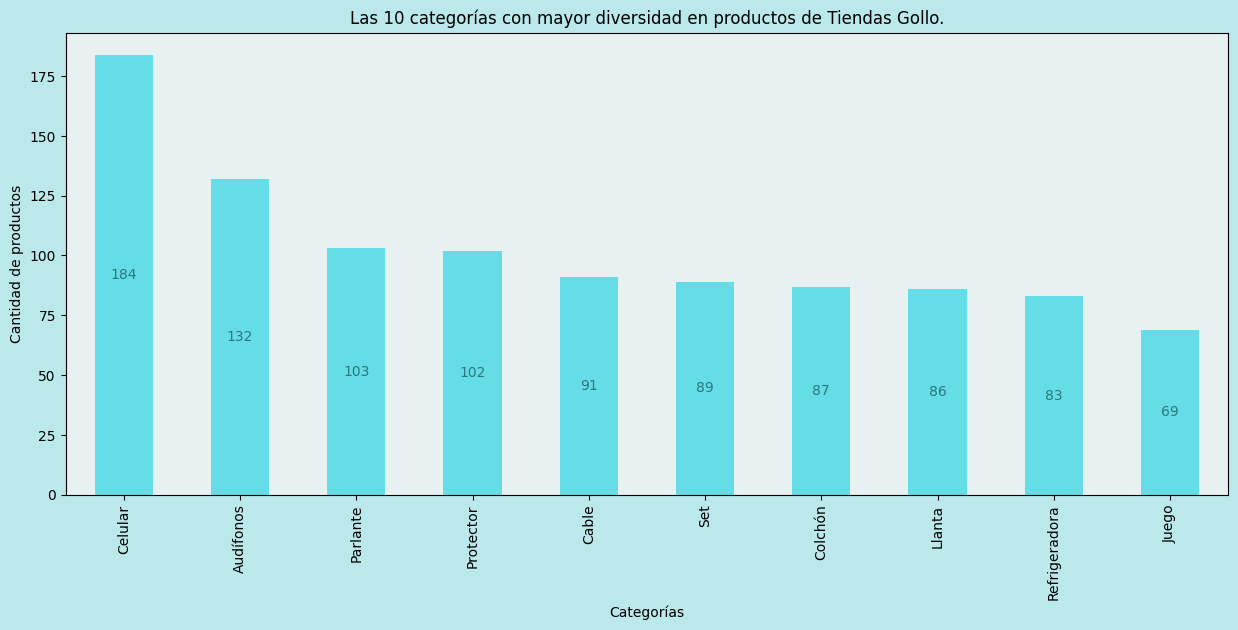

In [13]:


ax = mdf1_filtered.plot(
    x= 'Categoría',  # Especificar la columna para el eje x
    y= 'Agrupación',   # Especificar la columna para el eje y
    kind='bar', # Tipo de gráfico
    legend=False,
    stacked=False,
    title='Las '+ str(top) +' categorías con mayor diversidad en productos de Tiendas Gollo.',
    ylabel='Cantidad de productos',
    xlabel='Categorías',
    color='#65DDE6', # Color de barras
    figsize=(15, 6) # Tamaño del gráfico
)

# Agregar el la ettiqueta del número de productos en la barra
ax.bar_label(ax.containers[0],label_type='center', color='#2A777D')
ax.set_facecolor('#E7F1F2')

fig = ax.get_figure() # Obtener el contenido fuera del gráfico
fig.set_facecolor('#BBE8EB') # Cambiar el color del exterior

# visualizing the plot
plt.show()

